In [ ]:
# Creating the DataFrame
import pandas as pd
data = {'boiler_case_tmp': [30.25],
        'is_boiler_on': [None]}

index = pd.to_datetime(['2024-03-11 17:00:00+00:00'])

df = pd.DataFrame(data, index=index)

# get value of boiler_case_tmp
is_boiler_on = df['is_boiler_on'].values[0]
print(type(is_boiler_on))
print(str(is_boiler_on))
if is_boiler_on is None:
        print('is_boiler_on is None')

In [ ]:
if 0 < 1:
    e = 2
print(e)

In [1]:
from data_handler import DataHandler
from forecast import Forecast
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dataHandler = DataHandler(
influx_id="localhost",
db_name="smart_home_zukalovi",
db_username="root",
db_password="root",
relay_entity_id="shelly1pm_84cca8b07eae",
relay_power_entity_id="shelly1pm_84cca8b07eae_power",
tmp_boiler_case_entity_id="esphome_web_c771e8_tmp3",
tmp_output_water_entity_id="esphome_web_c771e8_ntc_temperature_b_constant_2",
start_of_data=datetime(2023, 11, 1, 0, 0, 0, 0))
left = datetime(2024,1,1,8,0,0)
right = datetime(2024,1,5,19,0,0)
data = dataHandler.get_actual_boiler_stats(group_by_time_interval="10m",limit=300, left_time_interval=left, right_time_interval=right)
data_for_prediction = dataHandler.get_data_for_prediction(left_time_interval=left, right_time_interval=right)

Importing /Users/adamgrunwald/Desktop/FIT/smart_boiler/smartboiler/src/smartboiler/data_handler.py


/Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Importing /Users/adamgrunwald/Desktop/FIT/smart_boiler/smartboiler/src/smartboiler/forecast.py
Importing /Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/smartboiler/__init__.py
Importing /Users/adamgrunwald/Library/Python/3.9/lib/python/site-packages/smartboiler/data_handler.py
Querying:  boiler_temperature SELECT last("value") AS "boiler_case_tmp" FROM "smart_home_zukalovi"."autogen"."°C" WHERE  "entity_id"='esphome_web_c771e8_tmp3' 
Querying:  is_boiler_on SELECT last("value") AS "is_boiler_on" FROM "smart_home_zukalovi"."autogen"."state" WHERE "entity_id"='shelly1pm_84cca8b07eae' 
                             index  is_boiler_on
0 2024-03-07 08:53:04.045439+00:00           1.0
Querying:  water_flow SELECT mean("value") AS "water_flow_L_per_minute_mean" FROM "smart_home_zukalovi"."autogen"."L/min" WHERE time > '2024-01-01T08:00:00Z' AND time < '2024-01-05T19:00:00Z' GROUP BY time(5s) FILL(0)
Querying:  water_temperature SELECT mean("value") AS "water_temperature_mean"

In [2]:
from forecast import Forecast
from datetime import datetime
start_of_data = datetime(2024, 1, 1, 0, 0, 0, 0)
forecast = Forecast(dataHandler,start_of_data=start_of_data, model_path='lstm_model_zukalovi.h5')
forecast.load_model(left_time_interval=start_of_data, right_time_interval=datetime(2024,1,2,8,0,0))
start_of_forecast = datetime(2023,12,31, 8, 0, 0, 0)
end_of_forecast = datetime(2024, 1, 1, 0, 0, 0, 0)
next_steps = forecast.get_forecast_next_steps(left_time_interval=start_of_forecast, right_time_interval=end_of_forecast)

left_time_interval 2024-01-01 00:00:00
right_time_interval 2024-01-02 08:00:00
Querying:  water_flow SELECT mean("value") AS "water_flow_L_per_minute_mean" FROM "smart_home_zukalovi"."autogen"."L/min" WHERE time > '2024-01-01T00:00:00Z' AND time < '2024-01-02T08:00:00Z' GROUP BY time(5s) FILL(0)
Querying:  water_temperature SELECT mean("value") AS "water_temperature_mean" FROM "smart_home_zukalovi"."autogen"."°C" WHERE time > '2024-01-01T00:00:00Z' AND time < '2024-01-02T08:00:00Z' AND "entity_id"='esphome_web_c771e8_ntc_temperature_b_constant_2' GROUP BY time(5s) FILL(null)
Querying:  temperature SELECT mean("temperature") AS "outside_temperature_mean" FROM "smart_home_zukalovi"."autogen"."state" WHERE time > '2024-01-01T00:00:00Z' AND time < '2024-01-02T08:00:00Z' AND "domain"='weather' AND "entity_id"='domov' GROUP BY time(5s) FILL(null)
Querying:  humidity SELECT mean("humidity") AS "outside_humidity_mean" FROM "smart_home_zukalovi"."autogen"."state" WHERE time > '2024-01-01T00:00:

In [3]:
print(next_steps)
from boiler import Boiler
boiler = Boiler(
    base_url='fsd',
    token='dfs',
    headers='fsd',
    boiler_switch_entity_id='dwe',
    dataHandler=dataHandler,

)

           0
0   0.037464
1   0.038517
2   0.036975
3   0.037489
4   0.035861
5   0.036932
6   0.035860
7   0.037069
8   0.036259
9   0.037479
10  0.036666
11  0.037441
Importing /Users/adamgrunwald/Desktop/FIT/smart_boiler/smartboiler/src/smartboiler/boiler.py
------------------------------------------------------

initializing of control...
	Capacity of Boiler = 100
	 Wattage of boiler = 2000

------------------------------------------------------

Getting high tarif schedule
Querying:  water_flow SELECT mean("value") AS "water_flow_L_per_minute_mean" FROM "smart_home_zukalovi"."autogen"."L/min" WHERE time > '2024-02-28T11:44:27Z' AND time < '2024-03-13T11:44:27Z' GROUP BY time(5s) FILL(0)
Querying:  water_temperature SELECT mean("value") AS "water_temperature_mean" FROM "smart_home_zukalovi"."autogen"."°C" WHERE time > '2024-02-28T11:44:27Z' AND time < '2024-03-13T11:44:27Z' AND "entity_id"='esphome_web_c771e8_ntc_temperature_b_constant_2' GROUP BY time(5s) FILL(null)
Querying:  tem

<AxesSubplot:>

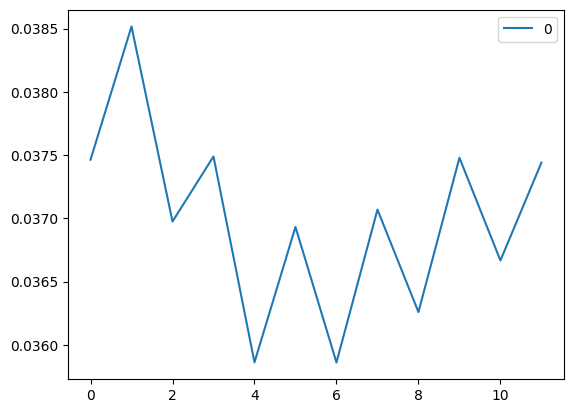

In [12]:
next_steps.plot()

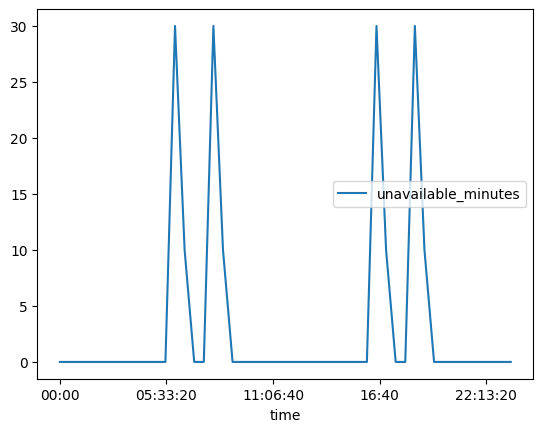

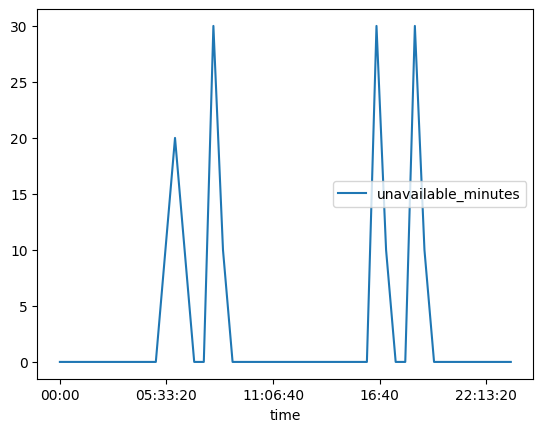

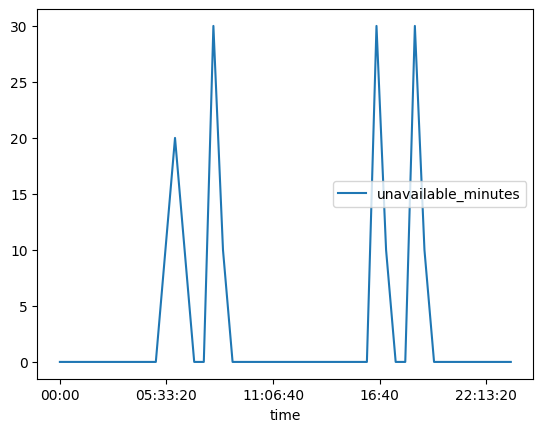

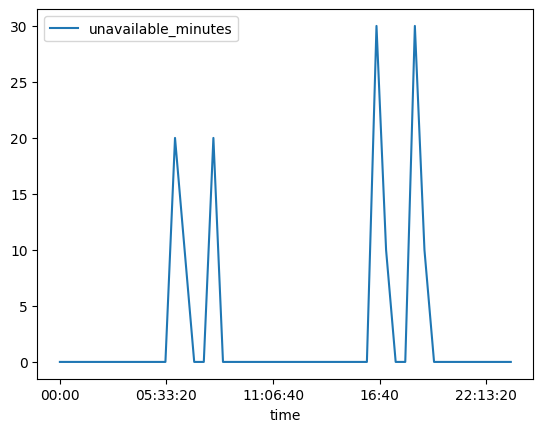

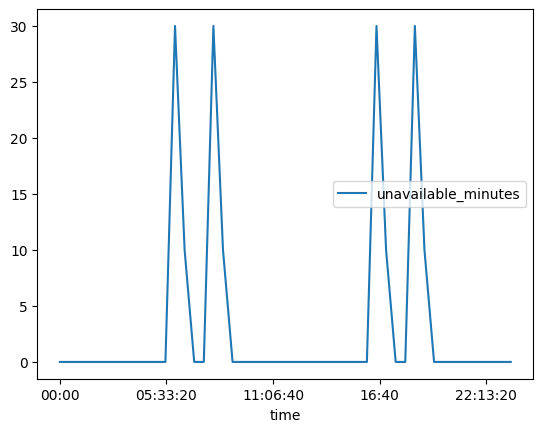

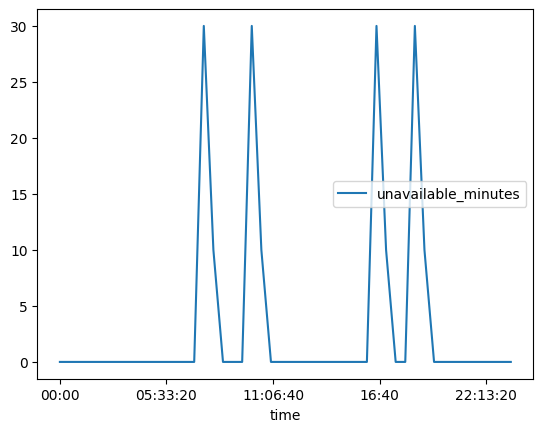

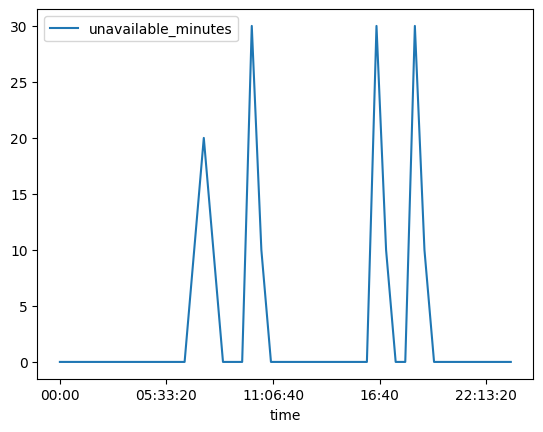

In [4]:
for i in range (0,7):
    df = boiler.high_tarif_schedule[boiler.high_tarif_schedule['weekday']==i]
    df.plot(x='time', y='unavailable_minutes')

In [11]:
boiler.is_needed_to_heat(tmp_act=55, prediction_of_consumption= next_steps
                         )

is_needed_to_heat: prediction_of_consumption:             0
0   0.037464
1   0.038517
2   0.036975
3   0.037489
4   0.035861
5   0.036932
6   0.035860
7   0.037069
8   0.036259
9   0.037479
10  0.036666
11  0.037441
boiler_kWh_above_set: 0.16152777777777777
len_of_df: 12
i: 12
sum_of_consumption: 0.2824828625172326
time_to_consumption_minutes: 360
unavailible_minutes: 40
time_needed_to_heat: 40.00014412390945
i: 11
sum_of_consumption: 0.24504219618916678
time_to_consumption_minutes: 330
unavailible_minutes: 40
time_needed_to_heat: 40.00012502152867
i: 10
sum_of_consumption: 0.20837573681343036
time_to_consumption_minutes: 300
unavailible_minutes: 30
time_needed_to_heat: 30.000106314151434
i: 9
sum_of_consumption: 0.1708968084388937
time_to_consumption_minutes: 270
unavailible_minutes: 0
time_needed_to_heat: 8.71922492035172e-05
i: 8
sum_of_consumption: 0.13463827051213223
time_to_consumption_minutes: 240
unavailible_minutes: 0
time_needed_to_heat: 6.869299515925113e-05
i: 7
sum_of_cons

False

In [ ]:
from influxdb import InfluxDBClient, DataFrameClient

dataHandlerForm = DataHandler(influx_id="localhost",
db_name="smart_home_formankovi",
db_username="root",
db_password="root",
relay_entity_id="shelly1pm_34945475a969",
relay_power_entity_id="shelly1pm_84cca8b07eae_power",
tmp_boiler_case_entity_id="shelly1pm_34945475a969_temperature_2",
tmp_output_water_entity_id="esphome_boiler_temps_ntc_temperature_b_constant",
start_of_data=datetime(2023, 11, 1, 0, 0, 0, 0))

In [ ]:
train_form = dataHandlerForm.get_data_for_training_model()
# save as pkl
import pickle
with open('train_form_data.pkl', 'wb') as f:
    pickle.dump(train_form, f)

In [ ]:
train_zuka = dataHandler.get_data_for_training_model()

In [ ]:
# save as pkl
import pickle
with open('train_zuka_data.pkl', 'wb') as f:
    pickle.dump(train_zuka, f)

In [ ]:
from matplotlib.pyplot import ylim


data_for_prediction.plot(y='longtime_mean', kind='line', ylim=0)

In [ ]:
from forecast import Forecast
from datetime import datetime
start_of_data = datetime(2024, 1, 1, 0, 0, 0, 0)
forecast = Forecast(dataHandler,start_of_data=start_of_data, model_path='lstm_model_zukalovi.h5')
forecast.load_model(left_time_interval=start_of_data, right_time_interval=datetime(2024,1,2,8,0,0))
start_of_forecast = datetime(2023,12,31, 8, 0, 0, 0)
end_of_forecast = datetime(2024, 1, 1, 0, 0, 0, 0)
next_steps = forecast.get_forecast_next_steps(left_time_interval=start_of_forecast, right_time_interval=end_of_forecast)

In [ ]:


next_steps.plot(y='longtime_mean', ylim=0, kind='line')
vals = next_steps['longtime_mean']
# create a dict with the values and index as key
vals = vals.to_dict()
print(vals)



In [ ]:
test_gen = forecast.generator(dataframe = forecast.df_train_norm, 
                     target_name = 'longtime_mean', 
                     lookback = forecast.lookback,
                     delay = forecast.delay,
                     min_index = 0,
                     max_index = None,
                     step = 1,
                     shuffle = False,
                     batch_size = forecast.df_train_norm.shape[0])
(X, y_truth) = next(test_gen)
y_pred = forecast.model.predict(X)

(X, y_truth) = next(test_gen)

y_pred = forecast.model.predict(X)

np.expand_dims(y_truth,axis=1).shape
y_pred = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred = forecast.scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

y_truth = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth = forecast.scaler.inverse_transform(y_truth)
y_truth = y_truth[:,0]
from scipy import stats
from sklearn.metrics import mean_squared_error

# plot y_pred and y_truth
plt.plot(y_pred[-500:], label='y_pred')
plt.plot(y_truth[-500:], label='y_truth')
slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred,y=y_truth)
mse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=False)


print('R2 = ',r_value*r_value)
print('mse = ',mse)
print('rmse = ',rmse)

In [ ]:
test_gen = forecast.generator(dataframe = forecast.df_train_norm, 
                     target_name = 'longtime_mean', 
                     lookback = forecast.lookback,
                     delay = forecast.delay,
                     min_index = 0,
                     max_index = None,
                     step = 1,
                     shuffle = False,
                     batch_size = forecast.df_train_norm.shape[0])
(X, y_truth) = next(test_gen)
y_pred = model.predict(X)

(X, y_truth) = next(test_gen)

y_pred = forecast.model.predict(X)

np.expand_dims(y_truth,axis=1).shape
y_pred = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred = forecast.scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

y_truth = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth = forecast.scaler.inverse_transform(y_truth)
y_truth = y_truth[:,0]
from scipy import stats
from sklearn.metrics import mean_squared_error

# plot y_pred and y_truth
plt.plot(y_pred[-500:], label='y_pred')
plt.plot(y_truth[-500:], label='y_truth')
slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred,y=y_truth)
mse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_truth, y_pred=y_pred, squared=False)


print('R2 = ',r_value*r_value)
print('mse = ',mse)
print('rmse = ',rmse)

In [ ]:
next_steps = forecast.get_forecast_next_steps(left_time_interval=datetime(2024,2,27,0,0,0),right_time_interval=datetime(2024, 3, 1, 0, 0, 0))


In [ ]:
print(next_steps)

In [ ]:
plt.plot(next_steps['longtime_mean'], label='next_steps')


In [ ]:
# create dataframe with column datetime from now to now+6hours and rows by 30 minutes

forecast_begin_date = datetime(2024, 1, 1, 0, 0, 0) 
forecast_end_date = datetime(2024, 1, 4, 23, 59, 59)

df_predict = pd.DataFrame({'datetime': pd.date_range(forecast_begin_date, forecast_end_date, freq='30min')})
df_predict['longtime_mean'] = 0
df_predict['weekday_sin'] = np.sin(2 * np.pi * df_predict['datetime'].dt.weekday / 7)
df_predict['weekday_cos'] = np.cos(2 * np.pi * df_predict['datetime'].dt.weekday / 7)
df_predict['hour_sin'] = np.sin(2 * np.pi * df_predict['datetime'].dt.hour / 24)
df_predict['hour_cos'] = np.cos(2 * np.pi * df_predict['datetime'].dt.hour / 24)
df_predict['minute_sin'] = np.sin(2 * np.pi * df_predict['datetime'].dt.minute / 60)
df_predict['minute_cos'] = np.cos(2 * np.pi * df_predict['datetime'].dt.minute / 60)
# delete column datetime
df_predict = df_predict.drop(columns='datetime')
df_predict_trans = df_predict.copy()
df_predict_trans[df_predict.columns] = forecast.scaler.transform(df_predict)

predict_gen = forecast.generator(df_predict_trans, 'longtime_mean', 
                lookback = forecast.lookback,
                delay = forecast.delay,
                min_index = 0,
                max_index = None,
                step = 1,
                shuffle = False,
                batch_size = df_predict.shape[0])

(X_2, y_2) = next(predict_gen)
print((X_2.shape))
y_pred_2 = forecast.model.predict(X_2)
y_pred_2_inv = np.concatenate((y_pred_2,np.zeros((y_pred_2.shape[0],forecast.num_of_features))),axis=1)
y_pred_2_inv = forecast.scaler.inverse_transform(y_pred_2_inv)
y_pred_2_inv = y_pred_2_inv[:,0]

plt.plot(y_pred_2_inv, color = 'green', label = 'Predicted data')
plt.plot(y_2, color = 'green', label = 'Predicted data')
plt.show()

In [ ]:
# create a df with datetime and predicted values
df_predicted = pd.DataFrame()
df_predicted['longtime_mean'] = y_pred_2
print(len(y_pred_2))
forecast_begin_date = forecast_begin_date + pd.Timedelta(5, unit='h')
x = pd.date_range(forecast_begin_date , forecast_end_date, freq='30min')
print(x.shape)
df_predicted['datetime'] = pd.date_range(forecast_begin_date , forecast_end_date, freq='30min')

In [ ]:
queries = {
            "water_flow": {
                "sql_query": f'SELECT mean("value") AS "water_flow_L_per_hour_mean" FROM "smart_home_zukalovi"."autogen"."L/min" GROUP BY time(5s) FILL(0)',
                "measurement": "L/min",
            },
            "water_temperature": {
                "sql_query": f'SELECT mean("value") AS "water_temperature_mean" FROM "smart_home_zukalovi"."autogen"."°C" WHERE "entity_id"=\'esphome_web_c771e8_ntc_temperature_b_constant_2\' GROUP BY time(5s) FILL(previous)',
                "measurement": "°C",},
            "boiler_wattage": {
                "sql_query": f'SELECT mean("value") AS "boiler_wattage_mean" FROM "smart_home_zukalovi"."autogen"."W" WHERE "entity_id"=\'shelly1pm_84cca8b07eae_power\' GROUP BY time(5s) FILL(0)',
                "measurement": "W",
            },
            }
            # "boiler_relay_status": {"sql_query": f'SELECT last("value") AS "boiler_relay_status" FROM "smart_home_formankovi"."autogen"."state" WHERE time > {time_interval_left} AND time < {time_interval_right} AND "entity_id"=\'{self.relay_entity_id}\' GROUP BY time(1h) FILL(previous)',
            #                        "measurement": "state"},
        
from influxdb import DataFrameClient
dataframe_client = DataFrameClient(
            host='localhost',
            port=8086,
            username='root',
            password='root',
            database='smart_home_zukalovi'
        )

df_all_list = []
# iterate over key an value in data_formankovi
for key, value in queries.items():
    # get data from influxdb
    result = dataframe_client.query(value["sql_query"])[
        value["measurement"]
    ]
    
    df = pd.DataFrame(result)
    df_all_list.append(df)
        


In [ ]:
df = pd.concat(df_all_list, axis=1)
df = df[['water_flow_L_per_hour_mean', 'water_temperature_mean', 'boiler_wattage_mean']]
print(df.head())

In [ ]:
import matplotlib.pyplot as plt
df = pd.concat(df_all_list, axis=1)
df = df[['water_flow_L_per_hour_mean', 'water_temperature_mean', 'boiler_wattage_mean']]
df['water_flow_L_per_hour_mean'] = df['water_flow_L_per_hour_mean']

df = df.resample('1min').mean()
df[f"consumed_heat_kJ"] = (
            df[f"water_flow_L_per_hour_mean"]
            * (df[f"water_temperature_mean"] - 10)
            * 4.186
            * 0.5
            
            
        )
df['boiler_wattage_kWh'] = df['boiler_wattage_mean'] / (1000*60)
df = df.groupby(pd.Grouper(freq='7D'))
df = df.agg({'consumed_heat_kJ': 'sum', 'water_flow_L_per_hour_mean': 'mean', 'water_temperature_mean': 'mean', 'boiler_wattage_kWh': 'sum'})
        
# df consumed_heat_kJ to kWh
df[f"consumed_heat_kWh"] = df[f"consumed_heat_kJ"] / (3600)
df[f"consumed_heat_kWh"] += 0.4*7
print(df)

df['heat_loss'] = df['consumed_heat_kWh'] - df['boiler_wattage_kWh']

plt.plot( df['boiler_wattage_kWh'], label="boiler_heat_kWh")
plt.plot( df['consumed_heat_kWh'], label="consumed_heat_kWh")
plt.legend()



In [ ]:
for i in range(12, 0, -1):
    print(i)

In [ ]:

from pytz import utc
from data_handler import DataHandler
from forecast import Forecast
from datetime import datetime, timedelta
start_of_data = datetime(2023, 11, 1)
end_of_training_data = datetime(2024, 1, 5)
dataHandler = DataHandler(
    "localhost",
    "smart_home_zukalovi",
    "root",
    "root",
    "shelly1pm_84cca8b07eae",
    "shelly1pm_84cca8b07eae_power",
    "esphome_web_c771e8_tmp3",
    "esphome_web_c771e8_ntc_temperature_b_constant_2",
start_of_data,
)

forecast = Forecast(dataHandler, start_of_data=start_of_data, model_path='lstm_model_zukalovi.h5')
forecast.train_model(begin_of_training=start_of_data, end_of_training=end_of_training_data)
forecast.build_model()
forecast.fit_model()







In [ ]:
from operator import le
import pandas as pd
import numpy as np

forecast_begin_date = datetime(2024, 1, 4, 0, 0, 0)
forecast_end_date = datetime(2024, 1, 1, 23, 59, 59)
queries = dataHandler.get_database_queries(
    left_time_interval=forecast_begin_date - timedelta(hours=48),
    right_time_interval=forecast_begin_date,
)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)
df_all.index = df_all.index.tz_localize(None)
df_all, _ = dataHandler.transform_data_for_ml(df_all, predicted_column="longtime_mean")
df_all_copy = df_all.copy()
forecast_future = pd.DataFrame()

current_forecast_begin_date = forecast_begin_date
current_forecast_end_date = forecast_begin_date + timedelta(minutes=30)
for i in range(0, 48):
    print("-----")

    df_predict = pd.DataFrame(
        {
            "datetime": pd.date_range(
                current_forecast_begin_date, current_forecast_end_date, freq="30min"
            )
        }
    )
    df_predict["longtime_mean"] = 0
    df_predict["weekday_sin"] = np.sin(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["weekday_cos"] = np.cos(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["hour_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["hour_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["minute_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    df_predict["minute_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    # delete column datetime
    df_predict = df_predict.drop(columns="datetime")
    len_df_predict = df_predict.shape[0]

    # concar df_all and df_predict

    df_all = pd.concat([df_all, df_predict], axis=0)
    df_all = df_all.reset_index(drop=True)

    df_predict_norm = df_all.copy()
    df_predict_norm[df_all.columns] = forecast.scaler.transform(df_all)
    # create predict df with values

    predict_gen = forecast.generator(
        dataframe=df_predict_norm,
        target_name=forecast.predicted_column,
        lookback=forecast.lookback,
        delay=forecast.delay,
        min_index=0,
        max_index=None,
        step=1,
        shuffle=False,
        batch_size=df_predict.shape[0],
    )

    (X, y_truth) = next(predict_gen)

    y_pred = forecast.model.predict(X)

    # np.expand_dims(y_truth,axis=1).shape
    y_pred_inv = np.concatenate(
        (y_pred, np.zeros((y_pred.shape[0], forecast.num_of_features))), axis=1
    )
    y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
    y_pred_inv = y_pred_inv[:, 0]
    # set df_all last len_df_predict values to y_pred_inv
    df_all.iloc[-len_df_predict:, df_all.columns.get_loc("longtime_mean")] = y_pred_inv
    # plt.plot(df_all.iloc[-len_df_predict:, df_all.columns.get_loc('longtime_mean')], color = 'green', label = 'Predicted data')
    df_all = df_all[len_df_predict:]
    forecast_future = pd.concat([forecast_future, df_all[-len_df_predict:]], axis=0)
    forecast_future = forecast_future.reset_index(drop=True)

    current_forecast_begin_date = current_forecast_begin_date + timedelta(hours=1)
    current_forecast_end_date = current_forecast_end_date + timedelta(hours=1)

In [ ]:
forecast_future.plot(y='longtime_mean', label='longtime_mean')
df_all_copy[-96:].plot(y='longtime_mean', label='longtime_mean')

In [ ]:
dataHandler.write_forecast_to_influxdb(forecast_future, 'consumption_forecast')

In [ ]:
test = df_all_copy['longtime_mean'].values
#add forecast_future to test
test = np.concatenate((test,forecast_future['longtime_mean'].values),axis=0)

plt.plot(df_all_copy['longtime_mean'], color = 'blue', label = 'Predicted data')
plt.plot(test[len(df_all_copy):], color = 'red', label = 'Predicted data', alpha=0.5)

In [ ]:
# save forecast.model
from matplotlib.pyplot import step
from tensorflow.keras.models import Sequential 
import tensorflow as tf
from keras.layers import Input, Dense

from keras.layers import LSTM
model_path = 'forecast_model'
# Create a basic model instance
model = Sequential()
model.add(tf.keras.Input(shape=(None, forecast.df_train_norm.shape[1])))
model.add(tf.keras.layers.Conv1D(filters=6, kernel_size=5, activation='relu'))
model.add(LSTM(6, return_sequences=True, activation='relu'))
model.add(LSTM(6, return_sequences=False, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam',metrics=[forecast.r2_keras])
test_data = forecast.df_train_norm.head(1000)
test_gen = forecast.generator(dataframe = test_data, 
                target_name = forecast.predicted_column, 
                lookback = forecast.lookback,
                delay = forecast.delay,
                min_index = 0,
                max_index = int(test_data.shape[0]*0.8),
                step = 1,
                shuffle = True,
                batch_size = forecast.batch_size)
# Evaluate the model
steps = int((test_data.shape[0]*0.9 - forecast.lookback) // forecast.batch_size)

loss, acc = model.evaluate(forecast.train_gen, verbose=1, steps=steps)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))
model.load_weights('lstm_model.h5')

# Re-evaluate the model
loss, acc = model.evaluate(forecast.train_gen, verbose=1, steps=steps)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


In [ ]:
print(forecast_future['longtime_mean'])

In [ ]:
# plt.plot(forecast_future['consumed_heat_kWh'], label="Predicted")

begin = datetime(2024, 1, 1, 0, 0, 0) 
end = datetime(2024, 1, 1, 23, 59, 59)

queries = dataHandler.get_database_queries(left_time_interval=begin - timedelta(days=1), right_time_interval=begin)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)

In [ ]:

df_all, _= dataHandler.transform_data_for_ml(df_all, predicted_column='longtime_mean')



In [ ]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

df_predict_norm = df_all.copy()
df_predict_norm[df_predict_norm.columns] = forecast.scaler.transform(df_all)
# create predict df with values 

predict_gen = forecast.generator(dataframe = df_predict_norm, 
        target_name = forecast.predicted_column, 
        lookback = forecast.lookback,
        delay = forecast.delay,
        min_index = 0,
        max_index = None,
        step = 1,
        shuffle = False,
        batch_size = df_predict_norm.shape[0])

(X, y_truth) = next(predict_gen)

y_pred = forecast.model.predict(X)

# np.expand_dims(y_truth,axis=1).shape
y_pred_inv = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:,0]

y_truth_inv = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth_inv = forecast.scaler.inverse_transform(y_truth_inv)
y_truth_inv = y_truth_inv[:,0]

statistics = {}
slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred_inv,y=y_truth_inv)
mse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=True)
rmse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=False)

statistics['slope'] = slope
statistics['intercept'] = intercept
statistics['r_value'] = r_value
statistics['p_value'] = p_value
statistics['std_err'] = std_err
statistics['mse'] = mse
statistics['rmse'] = rmse




In [ ]:
print(statistics)

In [ ]:
import matplotlib.pyplot as plt
from pyparsing import col
plt.plot(y_pred_inv, label="Predicted")
plt.plot(y_truth_inv, label="True", color='red')